https://www.kaggle.com/uciml/student-alcohol-consumption

In [0]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [0]:
#tabela sobre alunos entrevistados sobre a condição de vida e o progresso acadêmico.
stud = pd.read_csv('student-por.csv')

In [0]:
stud.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [0]:
#usando o metodo loc para selecionar colunas específicas da tabela para analisar
stud.loc[0:,['school','sex','age','Pstatus','guardian','studytime','failures','famsup','higher','famrel','goout','Dalc','Walc', 'G3']]

,school,sex,age,Pstatus,guardian,studytime,failures,famsup,higher,famrel,goout,Dalc,Walc,G3
0,GP,F,18,A,mother,2,0,no,yes,4,4,1,1,6
1,GP,F,17,T,father,2,0,yes,yes,5,3,1,1,6
2,GP,F,15,T,mother,2,3,no,yes,4,2,2,3,10
3,GP,F,15,T,mother,3,0,yes,yes,3,2,1,1,15
4,GP,F,16,T,father,2,0,yes,yes,4,2,1,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,A,other,2,2,yes,yes,5,4,4,5,9
391,MS,M,17,T,mother,1,0,no,yes,2,5,3,4,16
392,MS,M,21,T,other,1,3,no,yes,5,3,3,3,7
393,MS,M,18,T,mother,1,0,no,yes,4,1,3,4,10


In [0]:
#usando o metodo describe na "nova tabela"
#o modelo é sobre a tendência do aluno a ter uma nota pior
stud.loc[0:,['school','sex','age','Pstatus','guardian','studytime','failures','famsup','higher','famrel','goout','Dalc','Walc', 'G3']].describe()

,age,studytime,failures,famrel,goout,Dalc,Walc,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.035443,0.334177,3.944304,3.108861,1.481013,2.291139,10.415190
std,1.276043,0.839240,0.743651,0.896659,1.113278,0.890741,1.287897,4.581443
min,15.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,1.000000,0.000000,4.000000,2.000000,1.000000,1.000000,8.000000
50%,17.000000,2.000000,0.000000,4.000000,3.000000,1.000000,2.000000,11.000000
75%,18.000000,2.000000,0.000000,5.000000,4.000000,2.000000,3.000000,14.000000
max,22.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,20.000000


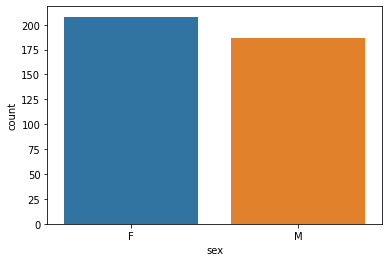

In [0]:
#O numero de garotos e garotas entrevistados é quase o mesmo (aproximadamente 200 cada)
sns.countplot(x='sex', data=stud)

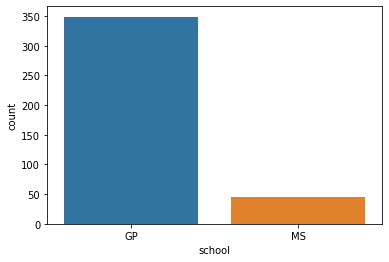

In [0]:
#A maior parte dos alunos entrevistados são da escola GP 
sns.countplot(x='school', data=stud)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


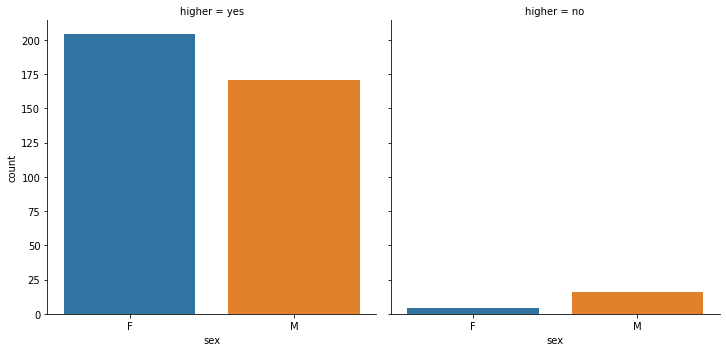

In [0]:
#relacionando a coluna "sexo" com a intenção de cursar "ensino superior"
#aqueles que não pretendem fazer ensino superior são mejoritariamente homens.
sns.factorplot(x="sex", col="higher", kind="count", data=stud)

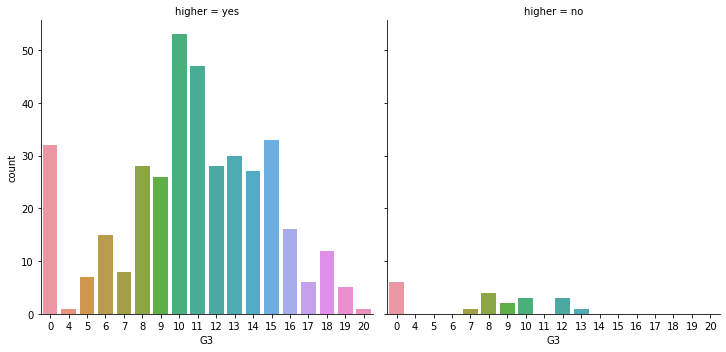

In [0]:
#mostrando a comparação entre a nota e final e a inteção de cursar o ensino superior.
#podemos perceber que aqueles que não possuem a intenção de fazer um curso superior tendem a ter notas mais baixas do que aqueles que planejam.
sns.catplot(x="G3", col="higher", kind="count", data=stud)

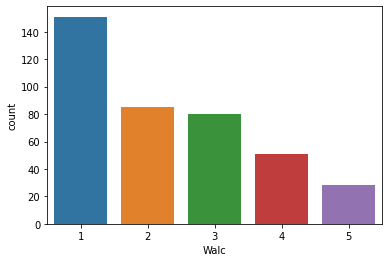

In [0]:
#mostrando a quantidade de pessoas que consomen pouco/muito álcool
sns.countplot(x='Walc', data=stud)

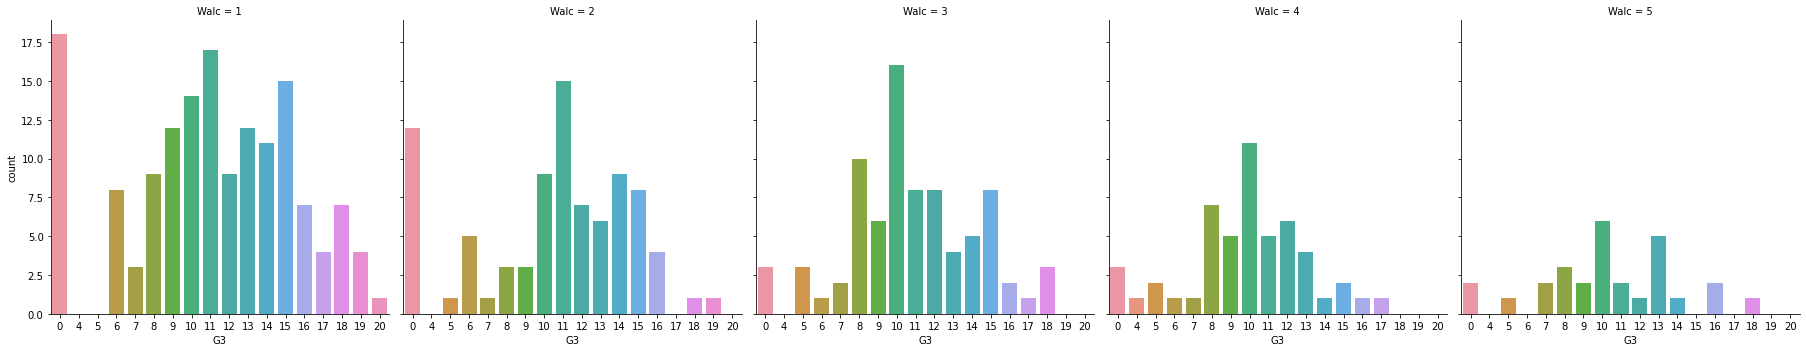

In [0]:
#comparando a nota final com o consumo de álcool.
#percebemos que os alunos que consomem mais álcool tendem a ter uma nota mais baixa.
#a frequência de notas maiores ocorre no walc1 até o walc3.
#a frequência de notas menores ocorre no walc4 e walc5.
sns.catplot(x="G3", col="Walc", kind="count", data=stud)

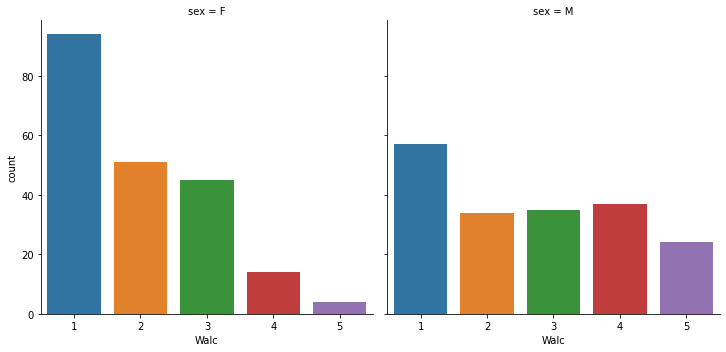

In [0]:
#A tendencia é de homens beberem mais do que mulheres
sns.catplot(x="Walc", col="sex", kind="count", data=stud)

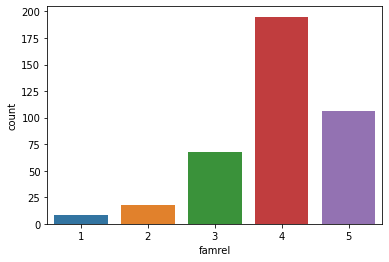

In [0]:
#A maior parte dos alunos marcou que tem um bom relacionamento com a familia (4)
sns.countplot(x='famrel',data=stud)

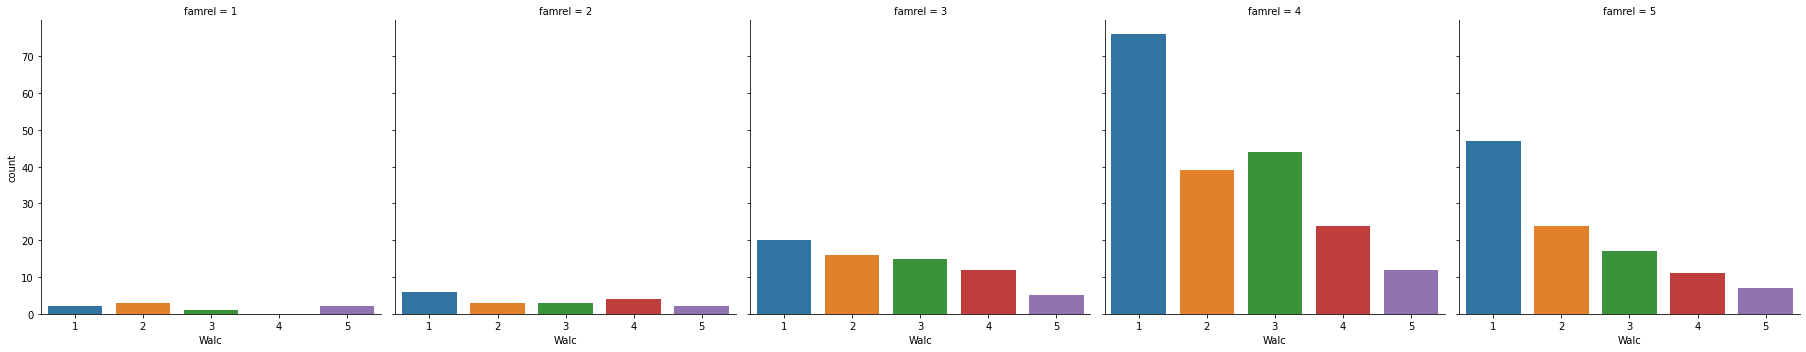

In [0]:
#A tendencia é de que quanto melhor o relacionamento com a familia, menor a frequencia que o aluno bebe em finais de semana
sns.catplot(x="Walc", col="famrel", kind="count", data=stud)

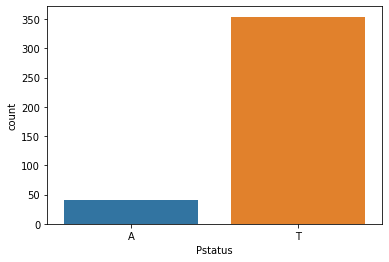

In [0]:
#A quantidade de alunos entrevistados com pais separados é muito pequena
sns.countplot(x='Pstatus',data=stud)

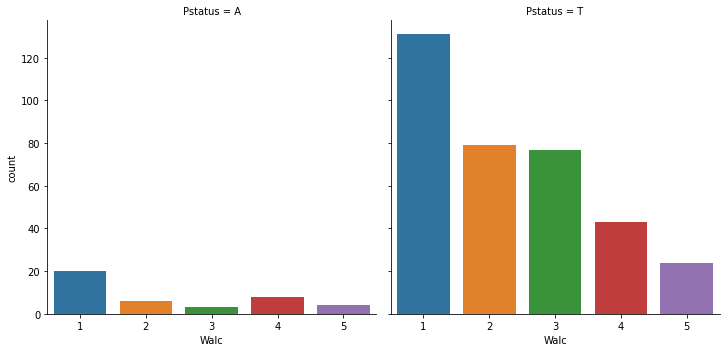

In [0]:
#A tendencia é de que alunos com pais separados bebam mais em finais de semana
sns.catplot(x="Walc", col="Pstatus", kind="count", data=stud)

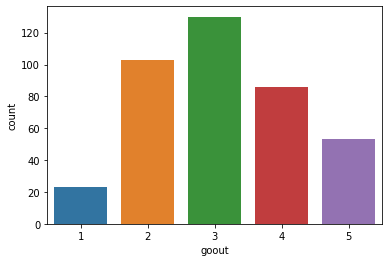

In [0]:
#A maior parte dos alunos entrevistados marcou o 3 como frequencia de saídas
sns.countplot(x='goout',data=stud)

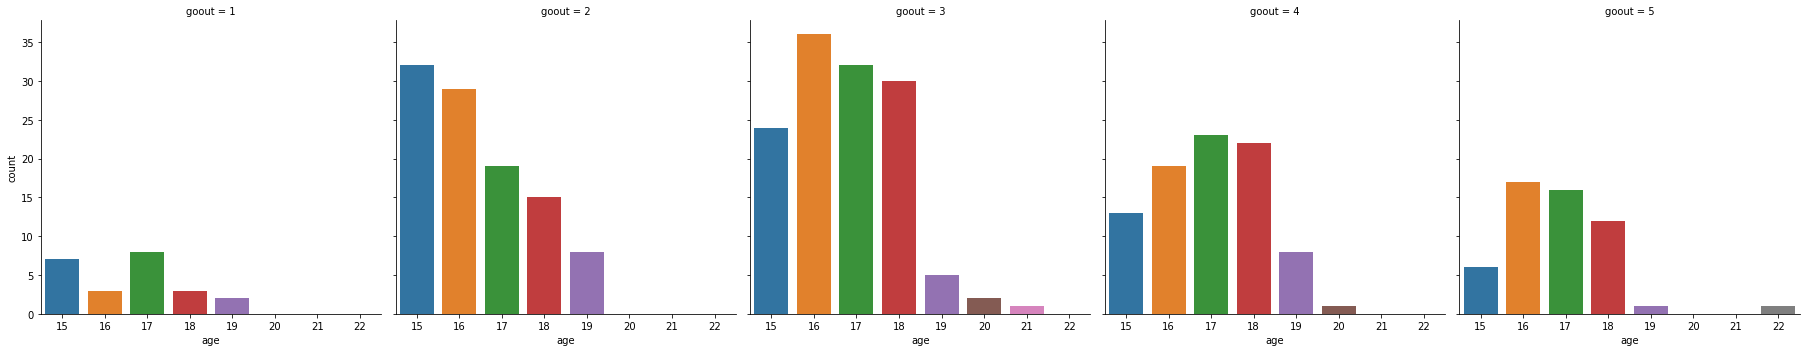

In [0]:
#Alunos com 16-18 anos tendem a sair mais em relação aos outros
sns.catplot(x="age", col="goout", kind="count", data=stud)

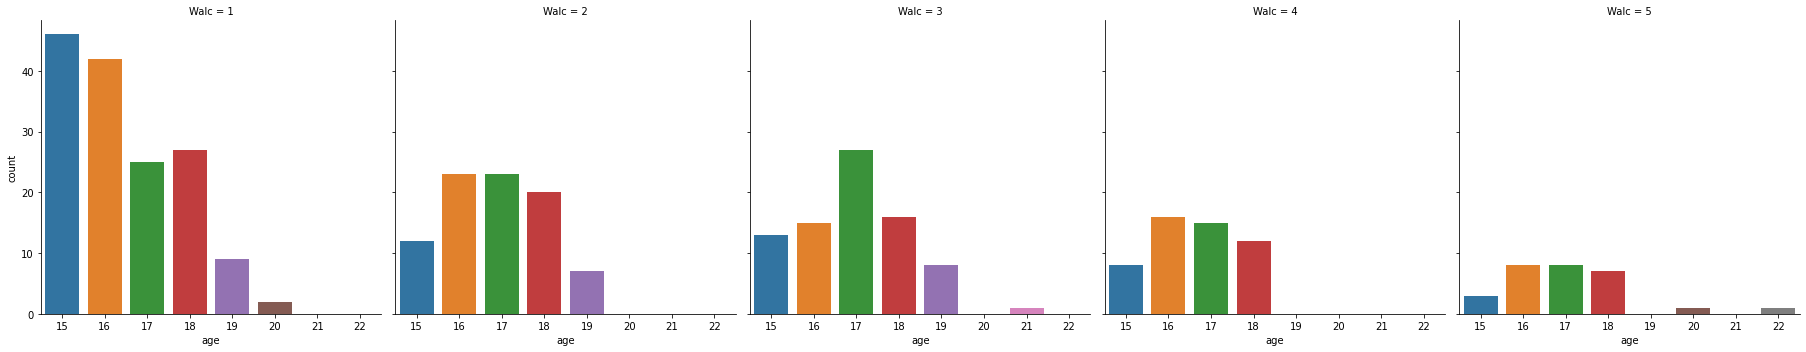

In [0]:
#Alunos com 17-18 anos tendem a beber mais
sns.catplot(x="age", col="Walc", kind="count", data=stud)

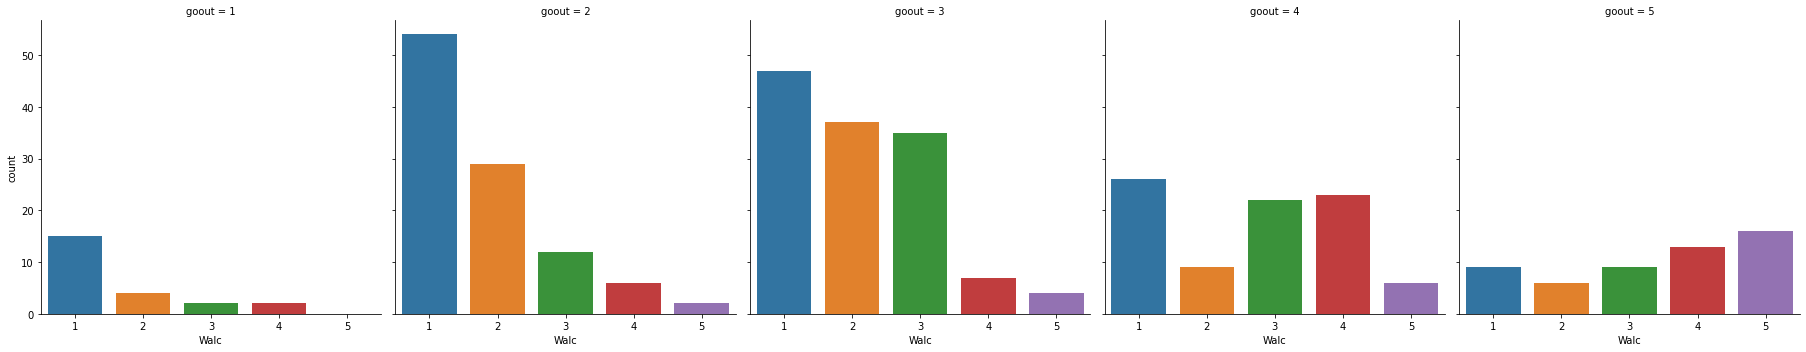

In [0]:
#Alunos que saem mais tem tendencia a beber mais
sns.catplot(x="Walc", col="goout", kind="count", data=stud)

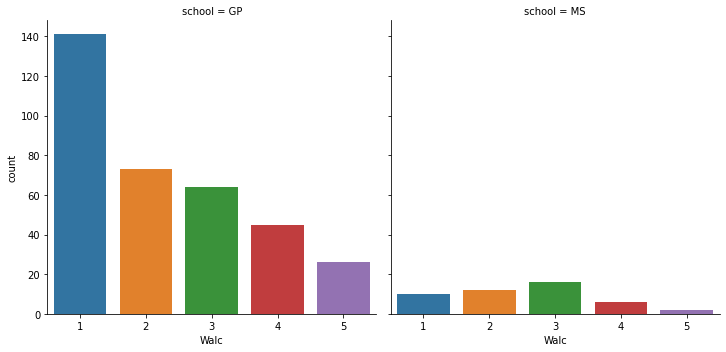

In [0]:
#Alunos que estudam na escola MS tem tendencia a beber mais
sns.catplot(x="Walc", col="school", kind="count", data=stud)

Homens

Não quer ensino superior

Relacionamento Familiar Ruim

Pais Separados

17-18 anos

Sai mais

Estuda na escola MS

= Tendencia a ter notas piores

________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________



________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

### Passo 1 - Escolha uma classe de modelo importando do Scikit.

In [0]:
from sklearn.ensemble import RandomForestClassifier

### Passo 2 - Escolha os hiperparâmetros do modelo instanciando a classe escolhida em 1.


In [0]:
model_forest = RandomForestClassifier()

### Passo 3 - Organize os dados em uma feature matrix e um target array.


In [0]:
# Passo 3.1 - Feature Matrix
X_stud = stud.loc[ : , ["famrel", "Dalc", "G3"]]
X_stud.head()

,famrel,Dalc,G3
0,4,1,11
1,5,1,11
2,4,2,12
3,3,1,14
4,4,1,13


In [0]:
# Passo 3.2 - Target Array
y_stud = stud.higher
y_stud.head()

0    yes
1    yes
2    yes
3    yes
4    yes
Name: higher, dtype: object

In [0]:
# Passo 3.3 - Separação do banco de dados
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_stud, y_stud, random_state=42)

### Passo 4 - Ajuste o modelo invocando o método fit().


In [0]:
model_forest.fit(X_train, y_train) #Passo 4

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Passo 5 - Aplique o modelo aos novos dados usando predict().


In [0]:
y_model_forest = model_forest.predict(X_test)

In [0]:
#Veja como ficou o modelo após aplicar a classificação
y_model_forest

array(['yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'no',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes', 'yes',
       'yes', 'yes

In [0]:
#Veja como teria que ser o modelo teóricamente (se estivesse correto)
y_test

636    yes
220    yes
594    yes
429    yes
72     yes
      ... 
457    yes
328    yes
320    yes
289    yes
140    yes
Name: higher, Length: 163, dtype: object

### Testando a acuracia

In [0]:
accuracy_score(y_test, y_model_forest)

0.9202453987730062

In [0]:
cross_val_score(model_forest, X_stud, y_stud, cv=5)

array([0.89230769, 0.88461538, 0.87692308, 0.87692308, 0.85271318])

In [0]:
#Tecnica leave one out
from sklearn.model_selection import LeaveOneOut
cross_val_score(model_forest, X_stud, y_stud, cv=LeaveOneOut()).mean()

0.8828967642526965

### Matriz de confusão

Text(83.40000000000006, 0.5, 'Valores Reais')

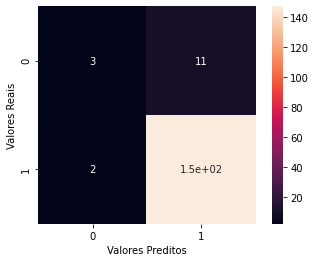

In [0]:
#Verificando onde estão os erros
#nesse caso ele colocou 11 pessoas que não querem fazer ensino superior como se quisessem
#e 2 que gostariam de fazer, como se não quisessem
from sklearn.metrics import confusion_matrix

mat_forest = confusion_matrix(y_test, y_model_forest)
sns.heatmap(mat_forest, square=True, annot=True)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')

# Outros modelos

## KNeighbors Classifier

In [0]:
#Passo 1
from sklearn.neighbors import KNeighborsClassifier 
#Passo 2
model_neighbors = KNeighborsClassifier(n_neighbors=1)
#Passo 3 (ja foi feito)
#Passo 4
model_neighbors.fit(X_train, y_train)
#Passo 5
y_model_neighbors = model_neighbors.predict(X_test)

In [0]:
#Testando acurácia
cross_val_score(model_neighbors, X_stud, y_stud, cv=5)

array([0.85384615, 0.88461538, 0.80769231, 0.79230769, 0.81395349])

Text(83.40000000000006, 0.5, 'Valores Reais')

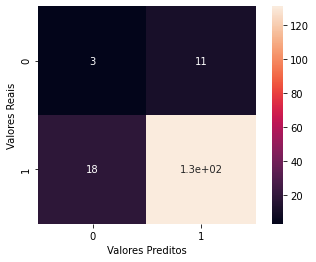

In [0]:
mat_neigh = confusion_matrix(y_test, y_model_neighbors)
sns.heatmap(mat_neigh, square=True, annot=True)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')

## Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier # Passo 1

In [0]:
model_tree = DecisionTreeClassifier() # Passo 2

In [0]:
#Passo 3 ja foi feito

In [0]:
model_tree.fit(X_train, y_train) #Passo 4

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
y_model_tree = model_tree.predict(X_test) #Passo 5

In [0]:
#Testar acurácia
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model_tree)

0.8834355828220859

In [0]:
cross_val_score(model_tree, X_stud, y_stud, cv=5)

array([0.84615385, 0.86923077, 0.86923077, 0.83076923, 0.82170543])

Text(83.40000000000006, 0.5, 'Valores Reais')

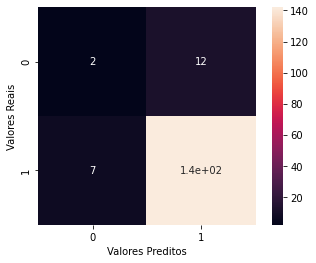

In [0]:
#Matriz de confusão
from sklearn.metrics import confusion_matrix

mat_tree = confusion_matrix(y_test, y_model_tree)
sns.heatmap(mat_tree, square=True, annot=True)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')

## Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB #Passo 1
model_bayes = GaussianNB()#Passo 2
#Passo 3 ja foi feito
model_bayes.fit(X_train, y_train)#Passo 4
y_model_bayes = model_bayes.predict(X_test)#Passo 5

In [0]:
#Testando acurácia
accuracy_score(y_test, y_model_bayes)

0.8957055214723927

In [0]:
cross_val_score(model_bayes, X_stud, y_stud, cv=5)

array([0.86153846, 0.87692308, 0.90769231, 0.86153846, 0.79069767])

In [0]:
#Tecnica leave one out
from sklearn.model_selection import LeaveOneOut
cross_val_score(model_bayes, X_stud, y_stud, cv=LeaveOneOut()).mean()

0.8674884437596302

Text(83.40000000000006, 0.5, 'Valores Reais')

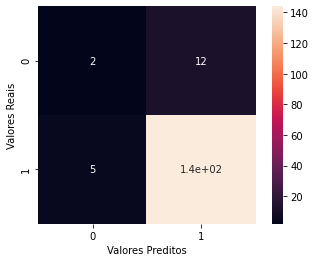

In [0]:
#Matriz de confusão
from sklearn.metrics import confusion_matrix

mat_bayes = confusion_matrix(y_test, y_model_bayes)
sns.heatmap(mat_bayes, square=True, annot=True)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')